In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Arnav/Desktop/internship/PROJECT 1/datasets/indiaAirQuality.csv",encoding='cp1252')

# Data Profiling

In [3]:
A.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
A.shape

(435742, 13)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
A.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


# Treating the missing values

In [7]:
A.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

from info we can see there are few missing values in each columns

In [8]:
# A.head() #accept entity all columns are continuous

In [9]:
def replacer(A):
    import pandas as pd
    Q=pd.DataFrame(A.isna().sum(),columns=["Ct"])
    missing_cols=list= (Q[Q.Ct>0].index)
    for i in missing_cols:
        if(A[i].dtypes == "object"):
            x= (A[i].mode())[0]
            A[i]= A[i].fillna(x)
        else:
            y= A[i].mean()
            A[i]= A[i].fillna(y)

In [10]:
replacer(A)

In [11]:
A.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

# Remove columns with no statistical importance

In [13]:
X=A.drop(labels=["stn_code","agency","location_monitoring_station","sampling_date"],axis=1) #dropping weight bcz we need to predict that

In [14]:
X['type'].value_counts()

Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [15]:
Xnew = list(X['type'])
for i in range(0, len(X)):
    if str(Xnew[i][0]) == 'R' and Xnew[i][1] == 'e':
        Xnew[i] = 'Residential'
    elif str(Xnew[i][0]) == 'I':
        Xnew[i] = 'Industrial'
    else:
        Xnew[i] = 'Other'

In [16]:
X['type'] = Xnew
X['type'].value_counts()

Residential    271356
Industrial     148071
Other           16315
Name: type, dtype: int64

more data recorded near residential area

# Exploratory Data Analysis

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type', ylabel='count'>

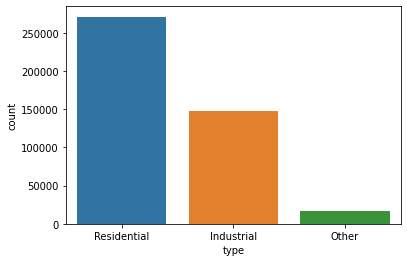

In [18]:
sb.countplot(X.type)

# x1 = SO2

STATE-WISE

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]

<AxesSubplot:xlabel='state'>

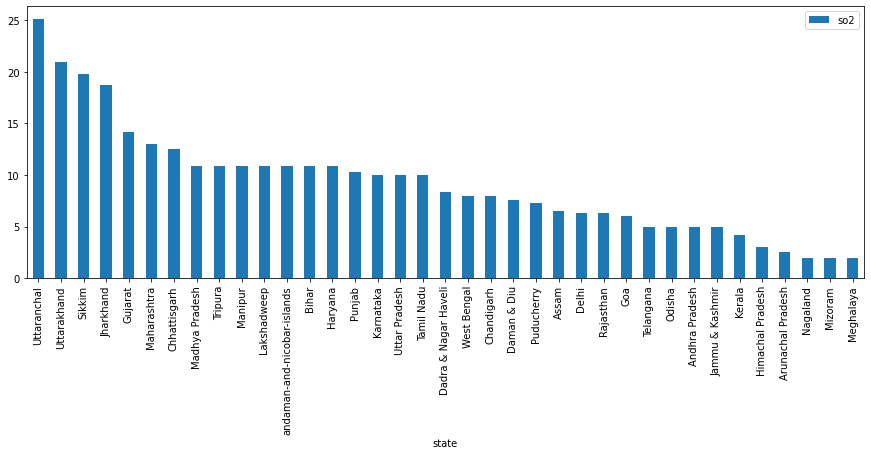

In [20]:
X[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

# From above plot, 
Uttranchal = highest SO2 || 
Meghalaya = lowest SO2

LOCATION-WISE

<AxesSubplot:xlabel='location'>

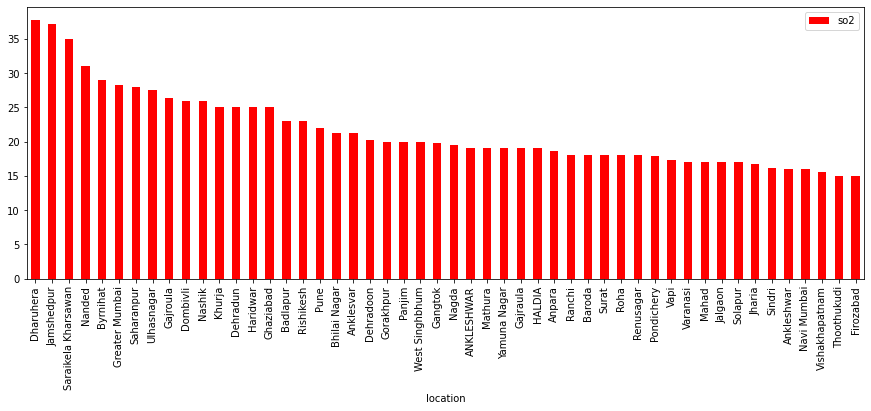

In [21]:
X[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'r')

# From above plot,
Dharuhera = highest SO2 (city-wise)

<AxesSubplot:xlabel='location'>

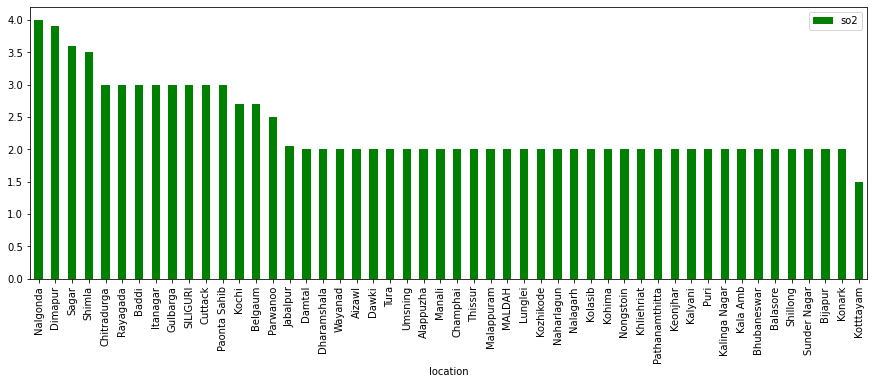

In [22]:
X[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'g')

# From above plot,
Kottayam= lowest SO2 (city-wise)

# x2 = NO2

STATE-WISE

<AxesSubplot:xlabel='state'>

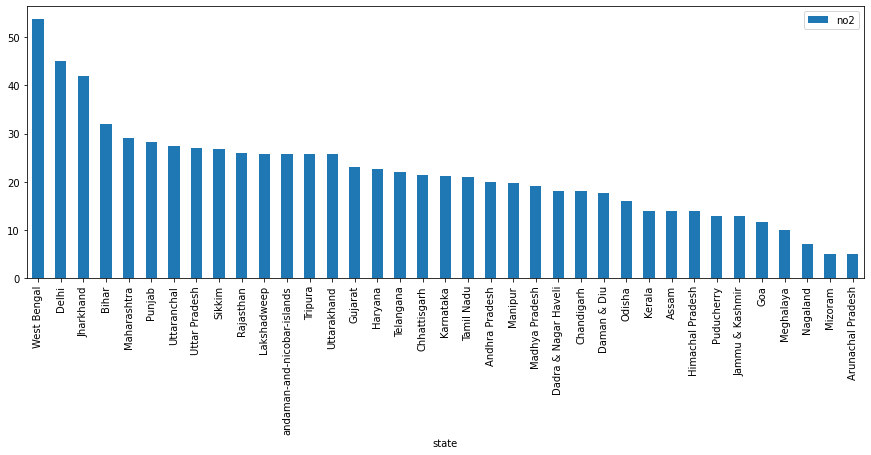

In [23]:
X[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar()

# From above plot,
West Bengal = highest NO2 || 
Arunachal Pradesh = lowest NO2

LOCATION-WISE

<AxesSubplot:xlabel='location'>

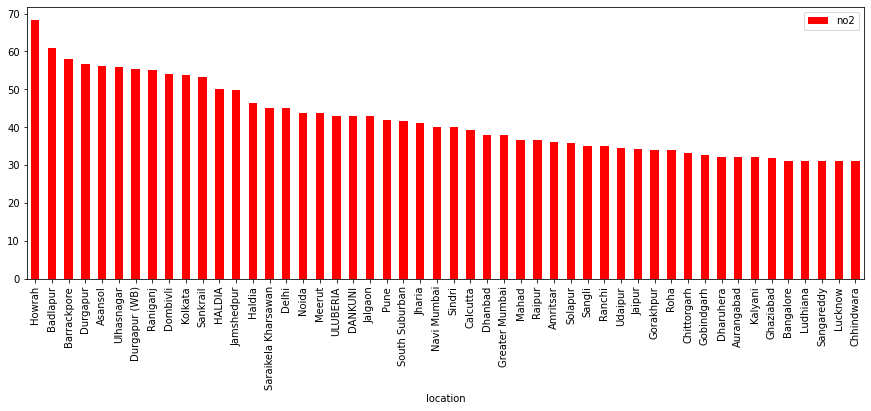

In [24]:
X[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'r')

# From above plot,
Howrah = highest NO2 (city-wise)

<AxesSubplot:xlabel='location'>

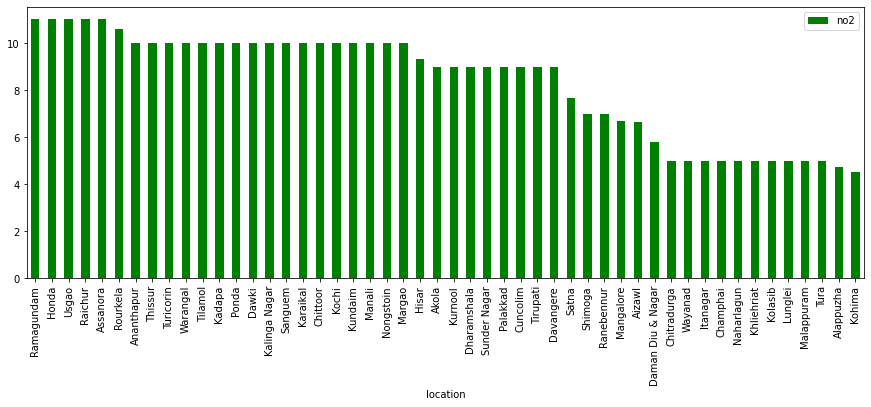

In [25]:
X[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

# From above plot,
Kohima = lowest NO2 (city-wise)

# x3 = RSPM

STATE-WISE

<AxesSubplot:xlabel='state'>

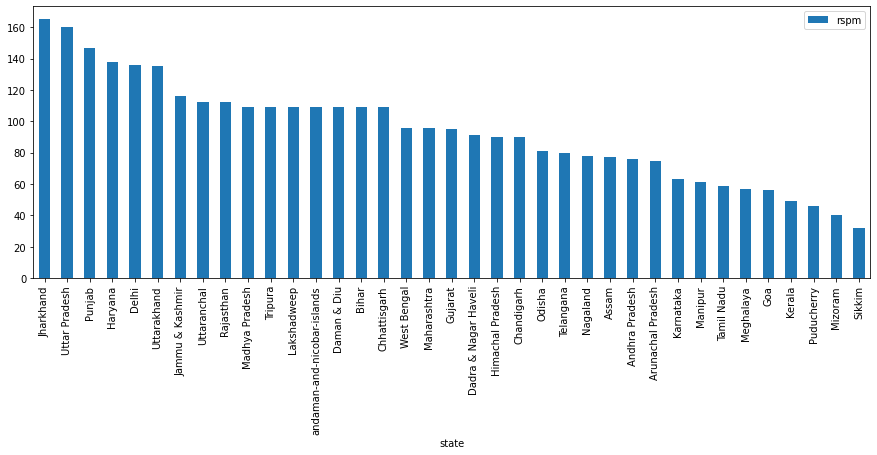

In [26]:
X[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar()

# From above plot,
Jharkhand = highest rspm || Sikkim = lowest rspm

LOCATION-WISE

<AxesSubplot:xlabel='location'>

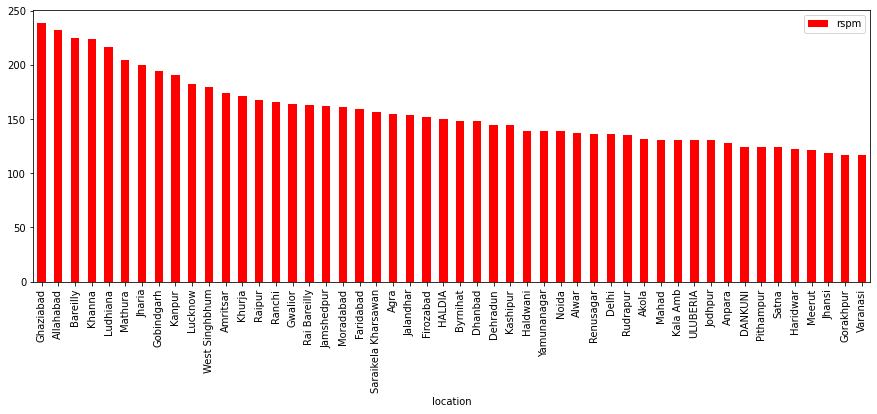

In [27]:
X[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

# From above plot,
Ghaziabad = Highest rspm (city-wise)

<AxesSubplot:xlabel='location'>

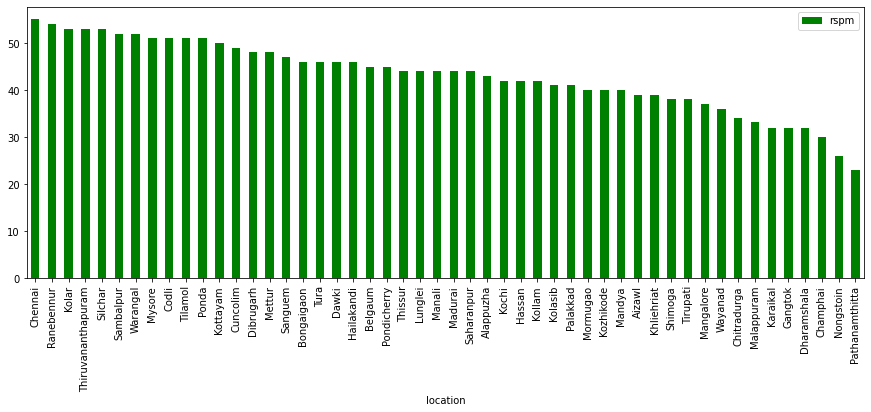

In [28]:
X[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'g')

# From above plot,
Pathanamthitta = Lowest rspm (city-wise)

# x4 = SPM

STATE-WISE

<AxesSubplot:xlabel='state'>

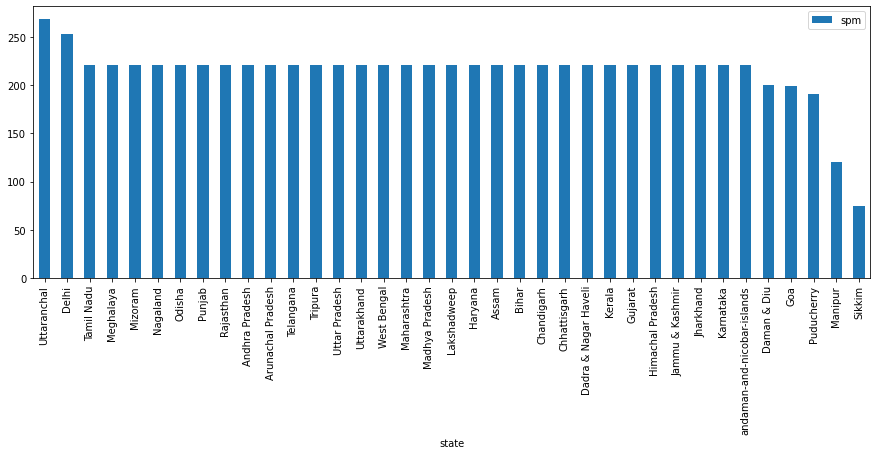

In [29]:
X[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar()

# From above plot,
Uttranchal = Highest spm || Sikkim = Lowest spm

LOCATION-WISE

<AxesSubplot:xlabel='location'>

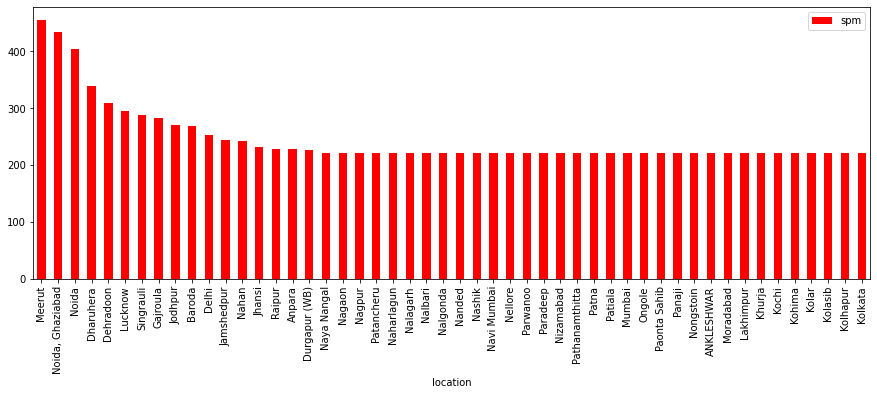

In [30]:
X[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

# From above plot,
Meerut = Highest spm (city-wise)

# x5 = PM2 5

STATE-WISE

<AxesSubplot:xlabel='state'>

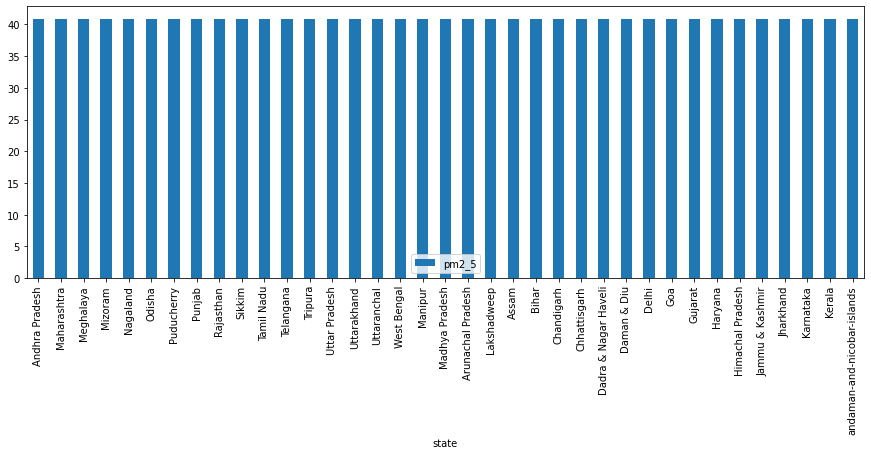

In [31]:
X[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar()

LOCATION-WISE

<AxesSubplot:xlabel='location'>

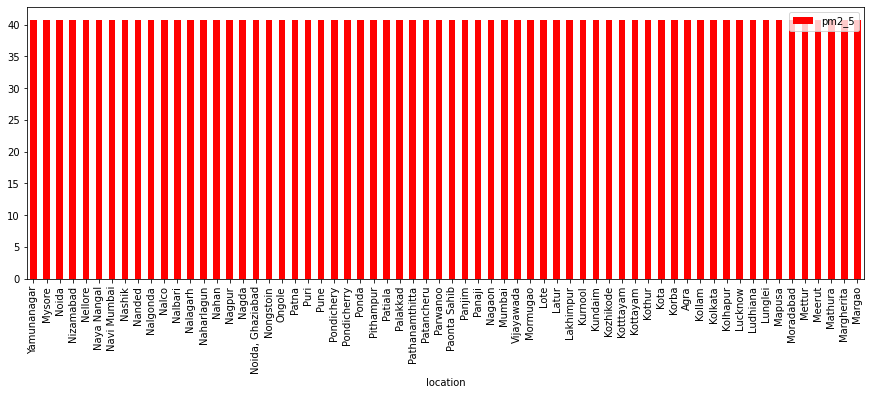

In [32]:
A[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

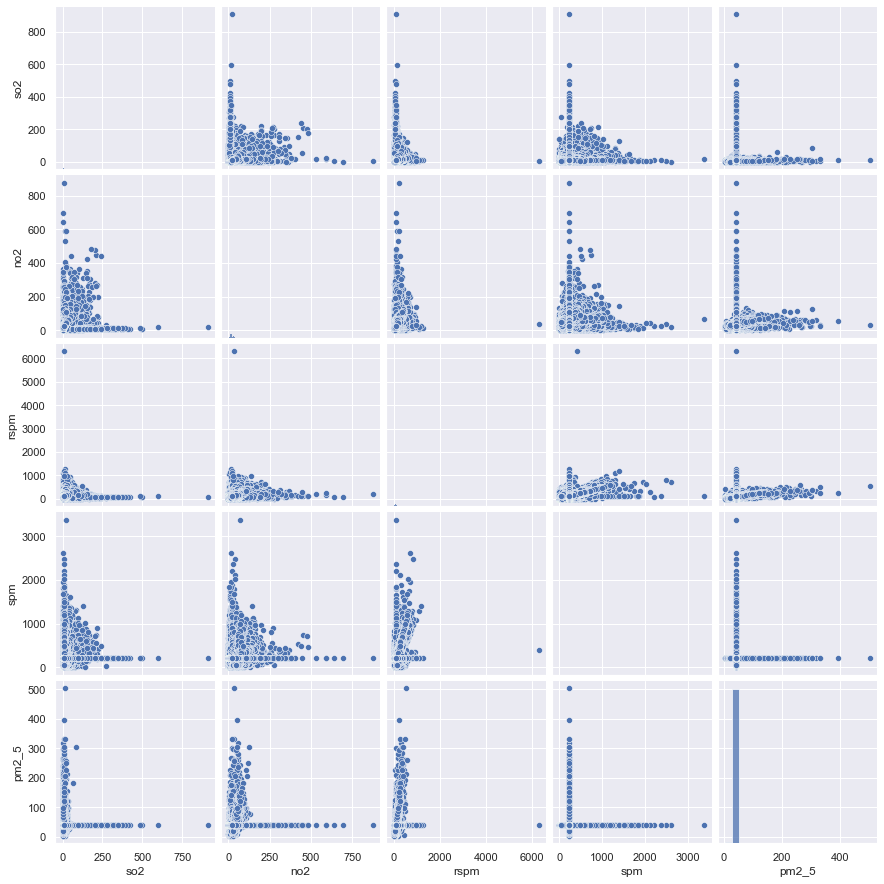

In [33]:
sb.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sb.pairplot(X[cols], size = 2.5)
plt.show()

<AxesSubplot:>

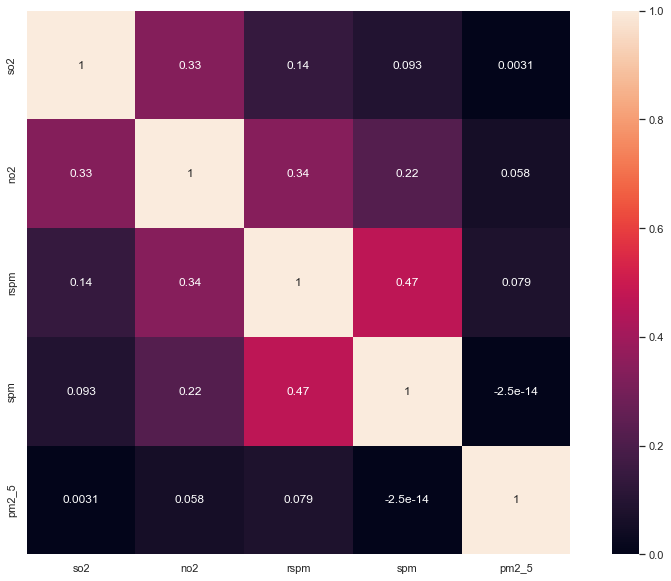

In [34]:
corrmat = X.corr()
f, ax = plt.subplots(figsize = (15, 10))
sb.heatmap(corrmat, vmax = 1, square = True, annot = True)

there is somewhat correlation with spm and rspm

# One hot encoding

In [35]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
       
    else:
        con.append(i)
       
       

In [36]:
X1=pd.get_dummies(X[cat])

In [37]:
X1

,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Dadra & Nagar Haveli,state_Daman & Diu,state_Delhi,state_Goa,...,date_2015-12-22,date_2015-12-23,date_2015-12-24,date_2015-12-25,date_2015-12-26,date_2015-12-27,date_2015-12-28,date_2015-12-29,date_2015-12-30,date_2015-12-31
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
435739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X2= X.join(X1)
X2.shape

(435742, 5420)

# Define X and Y

In [39]:
X = X2[["spm"]]
Y = X2[["state_Andhra Pradesh"]]

# Divide Data in Training and Testing set

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(X,Y,test_size=0.2,random_state=21)

In [41]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

#consistent data

(348593, 1)
(348593, 1)
(87149, 1)
(87149, 1)


# Create a ML Model

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

# Train the model

In [43]:
model=lm.fit(xtrain,ytrain)

# Fetch values of training results

In [49]:
b0=model.intercept_  #b0
b0

array([0.07175824])

In [51]:
round(0.07175824,4)

0.0718

In [53]:
b1=model.coef_ #b1
b1

array([[-5.17169845e-05]])

In [54]:
round(-5.17169845e-05,4)

-0.0001

# Use retrieved value for making a prediction

In [55]:
q = int(input("Enter any value for spm: "))
p = 0.0718 + -0.0001 * q
print("The predicted concentration of SPM in AndhraPradesh is: ",p)

Enter any value for spm: 60
The predicted concentration of SPM in AndhraPradesh is:  0.0658


# Calculating the error (cost/ loss function)

In [56]:
pred = model.predict(xtest[["spm"]])

In [57]:
pred

array([[0.06870694],
       [0.06033998],
       [0.06033998],
       ...,
       [0.06033998],
       [0.05505365],
       [0.06033998]])

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,pred)

0.11408049466953614

In [59]:
mean_squared_error(ytest,pred)

0.05741379238825041

# VISUALIZE THE RESULTS

<AxesSubplot:xlabel='spm', ylabel='state_Andhra Pradesh'>

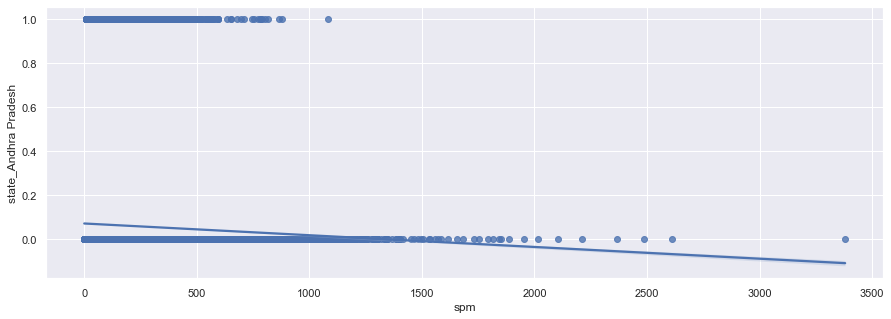

In [60]:
sb.regplot(X,Y)